In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.ExcelFile('Analise_Dados_mut.xlsx')

df_mut = pd.read_excel(open(df, 'rb'),
              sheet_name='GANGUES_GRUPO')

df_ark = pd.read_excel(open(df, 'rb'),
              sheet_name='DEV_ARCA')

In [62]:
df_mut.head()

,NOME,MUTAÇÃO.1,MUTAÇÃO.2,MUTAÇÃO.3,GANGUE/GRUPO,PAPEL,COMENTARIO,STATUS
0,ABUH,PARASITA,NaN,NaN,NENHUMA,S/PAPEL,CRIANÇA PRODIGIO,VIVO
1,ADOLFO,IMÃ HUMANO,NaN,NaN,SINDICATO,ENGENHOQUEIRO,UM ENGENHOQUEIRO QUE SE ISOLA NA GARAGEM,VIVO
2,AKA,INSETÓIDE,NaN,NaN,NENHUMA,BRUTAMONTES,FAZIA PARTE DOS PROTETORES E ERA O LOUVA ZONA,DESCONHECIDO
3,ALBERTO,PARASITA,SONAR,NaN,NENHUMA,CHEFÃO,"PERSONAGEM DO CLAUDIO, CHEFÃO DAS VONGOLA",MORTO
4,ALINE,ASAS DE INSETO,TERROR MENTAL,RASTREADORA,NENHUMA,CRONISTA,COFRE AURORA / MUTANTE ALEGRE (MARIPOSA),DESCONHECIDO


In [63]:
df_mut.shape# 119 Mutantes e 8 colunas diferentes

(119, 8)

In [64]:
df_mut.count() # Conta o numero de dados Coluna, mas 119 mutantes e 121 mutações? Tem algo errado

NOME            119
MUTAÇÃO.1       119
MUTAÇÃO.2        51
MUTAÇÃO.3         4
GANGUE/GRUPO    119
PAPEL           119
COMENTARIO      119
STATUS          119
dtype: int64

In [65]:
df_mut.shape

(119, 8)

## Agora vamos ver um pouco mais a fundo algumas partes dos dados, vamos começar pelas mutações, quais são? quantas são? quais as mais comuns? quais as mais raras?

In [66]:
mutacao = df_mut[['MUTAÇÃO.1', 'MUTAÇÃO.2', 'MUTAÇÃO.3']] #Unindo todas as mutações do DataSet
mutacao

,MUTAÇÃO.1,MUTAÇÃO.2,MUTAÇÃO.3
0,PARASITA,NaN,NaN
1,IMÃ HUMANO,NaN,NaN
2,INSETÓIDE,NaN,NaN
3,PARASITA,SONAR,NaN
4,ASAS DE INSETO,TERROR MENTAL,RASTREADORA
...,...,...,...
114,VELOCISTA,NaN,NaN
115,INSETÓIDE,LUMINESCENCIA,NaN
116,LUMINESCENTE,NaN,NaN
117,REPTILIANO,PERNAS DE RÃ,NaN


In [67]:
#Concatenamos todas as 3 colunas de mutações para que pudessemos analisa-las de uma vez só
m1 = mutacao["MUTAÇÃO.1"].value_counts()
m2 = mutacao["MUTAÇÃO.2"].value_counts()
m3 = mutacao["MUTAÇÃO.3"].value_counts()
m_all = [m1, m2, m3]
resultado = pd.concat(m_all)
resultado

HOMEM FERA               7
TELEPATIA                7
PLANTA HUMANA            6
VELOCISTA                6
NECRÓFAGO                6
PIROCINESE               6
INSETÓIDE                6
ASAS DE INSETO           6
REPTILIANO               5
PARASITA                 5
PERNAS DE RÃ             5
RASTREADOR               4
SONAR                    4
PAPA PODRIDÃO            4
IMÃ HUMANO               4
PATOCINESE               4
LUMINESCENTE             3
REFLEXOS EXTREMOS        3
QUATRO BRAÇOS            3
ESPOROS                  3
SOPRO DE FOGO            3
TERROR MENTAL            3
TITERITEIRO              2
DOIS CÉREBROS            2
CUSPE ÁCIDO              2
ELMO NATURAL             2
REGENERAR                2
ANFÍBIO                  2
ELÉTRICO                 1
DESCONHECIDO             1
VAI E VOLTA              1
MANIPULADOR DE SANGUE    1
REFLEXOS EXTREMOS        6
INSETÓIDE                4
HOMEM FERA               4
ANFÍBIO                  3
SONAR                    3
Q

In [68]:
print(f'O total de mutações é {resultado.shape}')

O total de mutações é (60,)


In [69]:
#O respectivo número de aparições
lista_mutacoes = resultado.groupby(resultado.index).sum()
lista_mutacoes

ANFÍBIO                   5
ASAS DE INSETO            7
CUSPE ÁCIDO               3
DESCONHECIDO              1
DOIS CÉREBROS             2
ELMO NATURAL              2
ELÉTRICO                  1
ESPOROS                   4
HOMEM FERA               11
HOMEM PLANTA              1
IMÃ HUMANO                6
INSETÓIDE                10
LUMINESCENCIA             2
LUMINESCENTE              3
MANIPULADOR DE SANGUE     2
NECRÓFAGO                 8
PAPA PODRIDÃO             8
PARASITA                  6
PATOCINESE                6
PERNAS DE RÃ              6
PIROCINESE                9
PLANTA HUMANA             6
QUATRO BRAÇOS             6
RASTREADOR                5
RASTREADORA               1
REFLEXOS EXTREMOS         9
REGENERAR                 2
REPTILIANO                5
SONAR                     7
SOPRO DE FOGO             6
TELEPATIA                 8
TERROR MENTAL             5
TITERITEIRO               3
VAI E VOLTA               1
VELOCISTA                 7
dtype: int64

In [70]:
#Organizando a Series para um DF, assim conseguiremos filtrar e tirar melhores conclusões
lista_mutacoes = lista_mutacoes.to_frame().reset_index()
lista_mutacoes = lista_mutacoes.rename(columns={'index':'MUTAÇÕES', 0:'APARIÇÕES'})
lista_mutacoes

,MUTAÇÕES,APARIÇÕES
0,ANFÍBIO,5
1,ASAS DE INSETO,7
2,CUSPE ÁCIDO,3
3,DESCONHECIDO,1
4,DOIS CÉREBROS,2
5,ELMO NATURAL,2
6,ELÉTRICO,1
7,ESPOROS,4
8,HOMEM FERA,11
9,HOMEM PLANTA,1


In [71]:
#As mutações mais comuns do nosso data set são essas
mais_comuns = lista_mutacoes.sort_values(by='APARIÇÕES', ascending=False, ignore_index=True)
mais_comuns.head(5)

,MUTAÇÕES,APARIÇÕES
0,HOMEM FERA,11
1,INSETÓIDE,10
2,REFLEXOS EXTREMOS,9
3,PIROCINESE,9
4,NECRÓFAGO,8


In [72]:
#Essas são as mutações mais raras do nosso data set
lista_mutacoes.query('APARIÇÕES == 1')

,MUTAÇÕES,APARIÇÕES
3,DESCONHECIDO,1
6,ELÉTRICO,1
9,HOMEM PLANTA,1
24,RASTREADORA,1
33,VAI E VOLTA,1


### Descobrimos aqui que as mutações mais comuns desses dados são HOMEM-FERA, INSETÓIDE, REF. EXTREMOS, PIROCINESE E NECRÓFAGO. Assim como as mais raras, que são ELÉTRICO, HOMEM PLANTA, RASTREADORA, VAI E VOLTA, assim como mutantes que nunca demonstraram suas mutações antes


## Vamos para as Gangues/Grupos agora, quais as mais numerosas?  Tem alguma que dê preferência a algum papel em específico? E a respeito dos mutantes que não se uniram a nenhum grupo?

In [73]:
gangues = df_mut[['GANGUE/GRUPO', 'PAPEL']]
gangues.head(10)

,GANGUE/GRUPO,PAPEL
0,NENHUMA,S/PAPEL
1,SINDICATO,ENGENHOQUEIRO
2,NENHUMA,BRUTAMONTES
3,NENHUMA,CHEFÃO
4,NENHUMA,CRONISTA
5,CONLUIO,NEGOCIANTE
6,VONGOLAS,NEGOCIANTE
7,NENHUMA,CRONISTA
8,NENHUMA,ENGENHOQUEIRO
9,ANARQUISTAS,NEGOCIANTE


In [74]:
gangues.groupby('GANGUE/GRUPO').count()

,PAPEL
GANGUE/GRUPO,
ANARQUISTAS,5
BROTHERS,21
CAIPIRAS,18
CONLUIO,11
NENHUMA,36
PRIDE,3
PROTETORES,8
SINDICATO,8
VONGOLAS,9


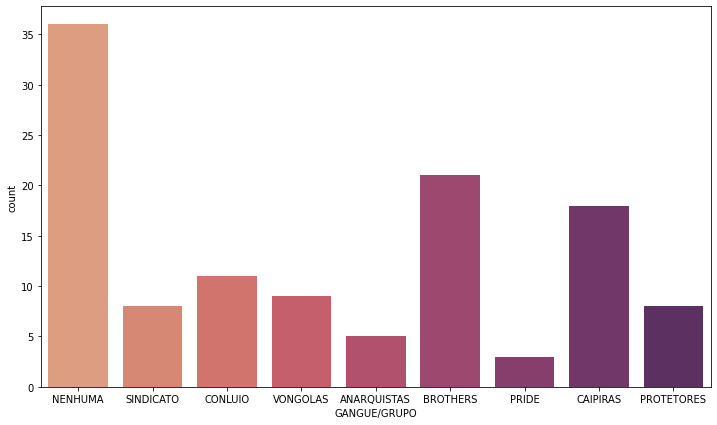

In [127]:
ax = plt.subplots(figsize = (12,7))
ax = sns.countplot(x="GANGUE/GRUPO", data=gangues, palette="flare")

In [75]:
gangues.groupby('PAPEL').count()

,GANGUE/GRUPO
PAPEL,
AD.CÃES,11
BATEDOR,20
BRUTAMONTES,23
CHEFÃO,7
CRONISTA,9
ENGENHOQUEIRO,15
NEGOCIANTE,13
S/PAPEL,4
SOLDADO,17


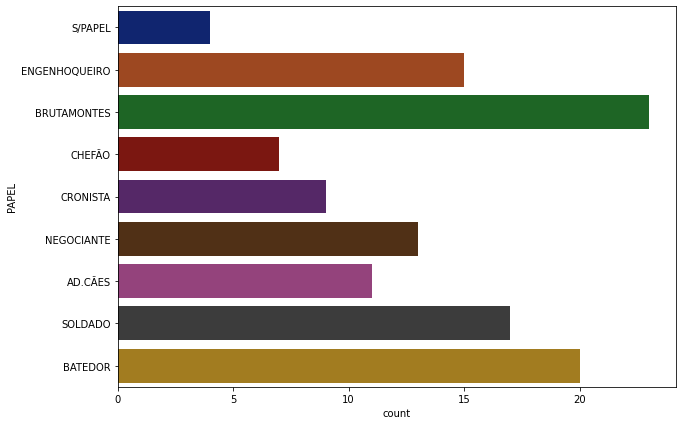

In [142]:
ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(y="PAPEL", data=gangues, palette="dark")

## Agora vamos observar de forma mais individual os papeis

In [76]:
ad_caes = gangues.query("PAPEL == 'AD.CÃES'")
ad_caes.groupby("GANGUE/GRUPO").count()
# Apesar de não haverem muitos adestradores de cães na Arca,
# eles parecem estar bem distribuidos ou darem uma ligeira preferencia a não entrarem em gangues

,PAPEL
GANGUE/GRUPO,
ANARQUISTAS,1
BROTHERS,2
CAIPIRAS,2
CONLUIO,1
NENHUMA,3
PRIDE,1
VONGOLAS,1


In [77]:
batedor = gangues.query("PAPEL == 'BATEDOR'")
batedor.groupby("GANGUE/GRUPO").count()
#Aqui vemos que as gangues Caipiras e Brothers se destacam no recrutamento de Batedores, engraçado, sabendo que
#os dois chefes dessas gangues têm ideias completamente diferentes a respeito do futuro do seu povo

,PAPEL
GANGUE/GRUPO,
ANARQUISTAS,1
BROTHERS,5
CAIPIRAS,5
CONLUIO,1
NENHUMA,5
PROTETORES,1
VONGOLAS,2


In [78]:
brutamontes = gangues.query("PAPEL == 'BRUTAMONTES'")
brutamontes.groupby("GANGUE/GRUPO").count()
#É esperado vermos os protetores da Arca terem um número razoavel de brutamontes, e os Brothers parecem ter
# como herança esse papel que pode assustar outros mutantes

,PAPEL
GANGUE/GRUPO,
BROTHERS,5
CAIPIRAS,3
CONLUIO,1
NENHUMA,5
PROTETORES,5
SINDICATO,3
VONGOLAS,1


In [79]:
cronista = gangues.query("PAPEL == 'CRONISTA'")
cronista.groupby("GANGUE/GRUPO").count()
#Cronistas claramente não são amigáveis a ideia de gangues, talvez por segregarem de alguma forma o povo

,PAPEL
GANGUE/GRUPO,
ANARQUISTAS,1
CAIPIRAS,1
NENHUMA,6
VONGOLAS,1


In [80]:
engenhoqueiro = gangues.query("PAPEL == 'ENGENHOQUEIRO'")
engenhoqueiro.groupby("GANGUE/GRUPO").count()

,PAPEL
GANGUE/GRUPO,
ANARQUISTAS,1
BROTHERS,4
CAIPIRAS,2
NENHUMA,4
PRIDE,1
SINDICATO,2
VONGOLAS,1


In [81]:
negociante = gangues.query("PAPEL == 'NEGOCIANTE'")
negociante.groupby("GANGUE/GRUPO").count()
#Os negociantes estão claramente se reunindo ao redor do grupo Conluio, talvez por conta de segurança maior

,PAPEL
GANGUE/GRUPO,
ANARQUISTAS,1
CAIPIRAS,2
CONLUIO,6
NENHUMA,3
VONGOLAS,1


In [82]:
sem_papel = gangues.query("PAPEL == 'S/PAPEL'")
sem_papel.groupby("GANGUE/GRUPO").count()

,PAPEL
GANGUE/GRUPO,
NENHUMA,4


In [83]:
soldado = gangues.query("PAPEL == 'SOLDADO'")
soldado.groupby("GANGUE/GRUPO").count()
#Uma distribuição parecida entre as gangues

,PAPEL
GANGUE/GRUPO,
BROTHERS,4
CAIPIRAS,2
CONLUIO,1
NENHUMA,3
PRIDE,1
PROTETORES,2
SINDICATO,2
VONGOLAS,2


In [84]:
mut_sem_gangues_vivos_ou_desc = df_mut[df_mut['GANGUE/GRUPO'].str.contains("NENHUMA") & (df_mut['STATUS'] != "MORTO")]
mut_sem_gangues_vivos_ou_desc = mut_sem_gangues_vivos_ou_desc[["NOME", "GANGUE/GRUPO", "PAPEL", "STATUS"]]
mut_sem_gangues_vivos_ou_desc
#Aqui temos um detalhamento dos mutantes que decidiram não se reunir em nenhuma gangue, que ainda estão presentes
#na arca ou que estão desaparecidos

,NOME,GANGUE/GRUPO,PAPEL,STATUS
0,ABUH,NENHUMA,S/PAPEL,VIVO
2,AKA,NENHUMA,BRUTAMONTES,DESCONHECIDO
4,ALINE,NENHUMA,CRONISTA,DESCONHECIDO
8,AWIRI/MODZI,NENHUMA,ENGENHOQUEIRO,VIVO
14,BUUH,NENHUMA,SOLDADO,VIVO
19,CATHARINA,NENHUMA,S/PAPEL,VIVO
38,HIRO,NENHUMA,BATEDOR,VIVO
40,JÃO,NENHUMA,ENGENHOQUEIRO,DESCONHECIDO
44,JOAQUIM,NENHUMA,BRUTAMONTES,DESCONHECIDO
49,KIRÁ,NENHUMA,CHEFÃO,DESCONHECIDO


# Agora vamos começar a analisar os dados da Arca em si e do seu desenvolvimento

In [85]:
#Esses dados consistem em uma lista de projetos e artefatos encontrados pelos aventureiros  que voltaram vivos para o povo
df_ark.head(10)

,TIPO,ATRIBUTO DE DEV,PONTOS DE DEV,DESCRIÇÃO,Unnamed: 4,Unnamed: 5
0,PROJETO,SUPRIMENTO DE COMIDA,6,GRUPO PARA CONSEGUIR COMIDA FORA DA ARCA,NaN,NaN
1,PROJETO,CULTURA,4,PRAÇA DE MERCADO NA ARCA (CAIPIRAS),NaN,NaN
2,PROJETO,TECNOLOGIA,-8,ESFORÇO DE GUERRA,NaN,NaN
3,PROJETO,CULTURA,-2,ESFORÇO DE GUERRA,NaN,NaN
4,PROJETO,SUPRIMENTO DE COMIDA,-10,ESFORÇO DE GUERRA,NaN,NaN
5,PROJETO,GUERRA,-6,ESFORÇO DE GUERRA,NaN,NaN
6,PROJETO,CULTURA,4,PRAÇA DO MERCADO,NaN,NaN
7,PROJETO,SUPRIMENTO DE COMIDA,4,PRAÇA DO MERCADO,NaN,NaN
8,PROJETO,TECNOLOGIA,1,RODA D'AGUA NA ARCA,NaN,NaN
9,PROJETO,CULTURA,6,ESCOLA ALBERTO VONGOLA,NaN,NaN


In [91]:
df_ark.isnull().sum()

TIPO                0
ATRIBUTO DE DEV     0
PONTOS DE DEV       0
DESCRIÇÃO           0
Unnamed: 4         40
Unnamed: 5         40
dtype: int64

In [93]:
df_ark.drop("Unnamed: 4", axis='columns', inplace=True)

In [ ]:
df_ark.drop("Unnamed: 5", axis='columns', inplace=True)

In [172]:
df_ark.columns = ['TIPO', 'ATRIBUTO_DEV', 'PONTOS_DEV', 'DESCRIÇÃO']

In [173]:
df_ark #Removidas as duas colunas que continham apenas valores nulos, podemos prosseguir com a analise

,TIPO,ATRIBUTO_DEV,PONTOS_DEV,DESCRIÇÃO
0,PROJETO,SUPRIMENTO DE COMIDA,6,GRUPO PARA CONSEGUIR COMIDA FORA DA ARCA
1,PROJETO,CULTURA,4,PRAÇA DE MERCADO NA ARCA (CAIPIRAS)
2,PROJETO,TECNOLOGIA,-8,ESFORÇO DE GUERRA
3,PROJETO,CULTURA,-2,ESFORÇO DE GUERRA
4,PROJETO,SUPRIMENTO DE COMIDA,-10,ESFORÇO DE GUERRA
5,PROJETO,GUERRA,-6,ESFORÇO DE GUERRA
6,PROJETO,CULTURA,4,PRAÇA DO MERCADO
7,PROJETO,SUPRIMENTO DE COMIDA,4,PRAÇA DO MERCADO
8,PROJETO,TECNOLOGIA,1,RODA D'AGUA NA ARCA
9,PROJETO,CULTURA,6,ESCOLA ALBERTO VONGOLA


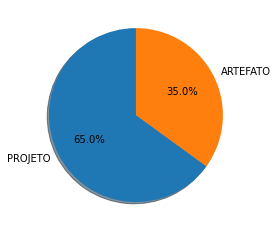

In [133]:
#Aqui ja podemos ver que a quantidade de Projetos é maior
#Lembrando que Projetos podem abranger tanto construções quanto esforços da guerra
tipo = df_ark['TIPO'].value_counts()
labels = ['PROJETO', 'ARTEFATO']
sizes = [65, 35]
ax = plt.subplot()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [98]:
df_ark["ATRIBUTO DE DEV"].value_counts()

CULTURA                 12
TECNOLOGIA              12
GUERRA                   8
SUPRIMENTO DE COMIDA     6
-                        2
Name: ATRIBUTO DE DEV, dtype: int64

In [174]:
devs = df_ark[["ATRIBUTO_DEV", "PONTOS_DEV",]].groupby("ATRIBUTO_DEV").sum()
devs
# Aqui temos a distribuição dos Pontos de DEV obtidos até agora

,PONTOS_DEV
ATRIBUTO_DEV,
-,0
CULTURA,37
GUERRA,13
SUPRIMENTO DE COMIDA,25
TECNOLOGIA,23


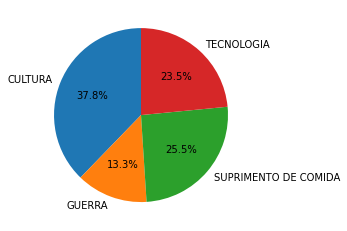

In [143]:
#Apenas para visualizarmos melhor a distribuição dos DEVs da Arca
labels = ['CULTURA', 'GUERRA', 'SUPRIMENTO DE COMIDA', 'TECNOLOGIA']
sizes = [(37/98)*100,(13/98)*100, (25/98)*100, (23/98)*100 ]
ax = plt.subplot()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [180]:
df_ark.query('ATRIBUTO_DEV == "GUERRA"')
#df_ark[df_ark['TIPO'].str.contains("PROJETO") & (df_ark['ATRIBUTO_DEV'] == "GUERRA")]

,TIPO,ATRIBUTO_DEV,PONTOS_DEV,DESCRIÇÃO
5,PROJETO,GUERRA,-6,ESFORÇO DE GUERRA
19,PROJETO,GUERRA,2,O GRUPO DOS PROTETORES (MILÍCIA)
22,ARTEFATO,GUERRA,1,ARMA RÁPIDA DE FLECHAS DOS ANTIGOS
25,PROJETO,GUERRA,6,ANDAIMES PARA AS MURADAS DA ARCA
29,ARTEFATO,GUERRA,1,RIFLE DE CAÇA
34,PROJETO,GUERRA,-3,INCÊNDIO NA GAIOLA
36,PROJETO,GUERRA,5,LUTA LIVRE DA ZONA (GAIOLA)
38,PROJETO,GUERRA,7,PAREDE DE MADEIRA+PEDRAS+FOSSO (DEFESAS)


In [182]:
df_ark.query('ATRIBUTO_DEV == "TECNOLOGIA"')

,TIPO,ATRIBUTO_DEV,PONTOS_DEV,DESCRIÇÃO
2,PROJETO,TECNOLOGIA,-8,ESFORÇO DE GUERRA
8,PROJETO,TECNOLOGIA,1,RODA D'AGUA NA ARCA
10,PROJETO,TECNOLOGIA,1,ESCOLA ALBERTO VONGOLA
11,ARTEFATO,TECNOLOGIA,2,MÁSCARA DE GÁS
12,ARTEFATO,TECNOLOGIA,3,CAPACETE DE HÓQUEI
14,PROJETO,TECNOLOGIA,6,GARAGEM LEVI (OFICINA)
21,ARTEFATO,TECNOLOGIA,1,ARMA RÁPIDA DE FLECHAS DOS ANTIGOS
23,ARTEFATO,TECNOLOGIA,1,CAPACETE USADO PELOS ANTIGOS
27,ARTEFATO,TECNOLOGIA,1,ANALGÉSICOS
28,ARTEFATO,TECNOLOGIA,4,BINÓCULOS


In [183]:
df_ark.query('ATRIBUTO_DEV == "SUPRIMENTO DE COMIDA"')

,TIPO,ATRIBUTO_DEV,PONTOS_DEV,DESCRIÇÃO
0,PROJETO,SUPRIMENTO DE COMIDA,6,GRUPO PARA CONSEGUIR COMIDA FORA DA ARCA
4,PROJETO,SUPRIMENTO DE COMIDA,-10,ESFORÇO DE GUERRA
7,PROJETO,SUPRIMENTO DE COMIDA,4,PRAÇA DO MERCADO
13,PROJETO,SUPRIMENTO DE COMIDA,5,LIMPEZA DA FONTE DE ÁGUA
16,PROJETO,SUPRIMENTO DE COMIDA,10,GRUDE DO CHÃO
39,PROJETO,SUPRIMENTO DE COMIDA,10,PEGA PEIXE (CHIQUEIRO)


In [184]:
df_ark.query('ATRIBUTO_DEV == "CULTURA"')

,TIPO,ATRIBUTO_DEV,PONTOS_DEV,DESCRIÇÃO
1,PROJETO,CULTURA,4,PRAÇA DE MERCADO NA ARCA (CAIPIRAS)
3,PROJETO,CULTURA,-2,ESFORÇO DE GUERRA
6,PROJETO,CULTURA,4,PRAÇA DO MERCADO
9,PROJETO,CULTURA,6,ESCOLA ALBERTO VONGOLA
15,PROJETO,CULTURA,5,CASA DA CONCHA
18,PROJETO,CULTURA,6,"HOMENAGEM AO ANCIÃO, ESTATUA NO CEMITERIO"
20,ARTEFATO,CULTURA,3,ESCRITA EM IMAGENS DE UM ANTIGO COM NOME HEROI
24,PROJETO,CULTURA,1,CEMITÉRIO O SOM DO SILÊNCIO
26,PROJETO,CULTURA,4,TEMPLO AO CULTO DO SILÊNCIO DA ZONA
31,ARTEFATO,CULTURA,1,ÓCULOS ESCUROS
